In [ ]:
from collections import defaultdict

def find_vertex_with_degree_leq(graph, max_degree):
    """Find a vertex with degree <= max_degree."""
    for vertex, neighbors in graph.items():
        if len(neighbors) <= max_degree:
            return vertex
    return None

def five_color_planar_graph(graph):
    """Color a planar graph using at most 5 colors."""
    # Step 1: Simplify the graph by recursively removing vertices with degree <= 5
    stack = []
    temp_graph = graph.copy()

    while temp_graph:
        vertex = find_vertex_with_degree_leq(temp_graph, 5)
        if vertex is None:
            raise ValueError("The graph is not planar or is malformed.")

        # Remove the vertex and save it for backtracking
        neighbors = temp_graph.pop(vertex)
        for neighbor in neighbors:
            temp_graph[neighbor].remove(vertex)
        stack.append((vertex, neighbors))

    # Step 2: Backtrack and color the vertices
    coloring = {}
    available_colors = ['red','blue','pink','green','yellow']

    while stack:
        vertex, neighbors = stack.pop()

        # Find used colors among neighbors
        used_colors = {coloring[neighbor] for neighbor in neighbors if neighbor in coloring}

        # Assign the first available color
        for color in available_colors:
            if color not in used_colors:
                coloring[vertex] = color
                break

    # Convert coloring to the desired output format
    color_groups = defaultdict(list)
    for vertex, color in coloring.items():
        color_groups[color].append(vertex)

    return dict(color_groups)




In [ ]:
# Example 1
graph1 = {
    1: {2, 3, 4},
    2: {1, 3, 5},
    3: {1, 2, 4, 5},
    4: {1, 3, 5},
    5: {2, 3, 4}
}

coloring = five_color_planar_graph(graph1)
print("Vertex Coloring:", coloring)

Vertex Coloring: {'red': [5, 1], 'blue': [4, 2], 'pink': [3]}


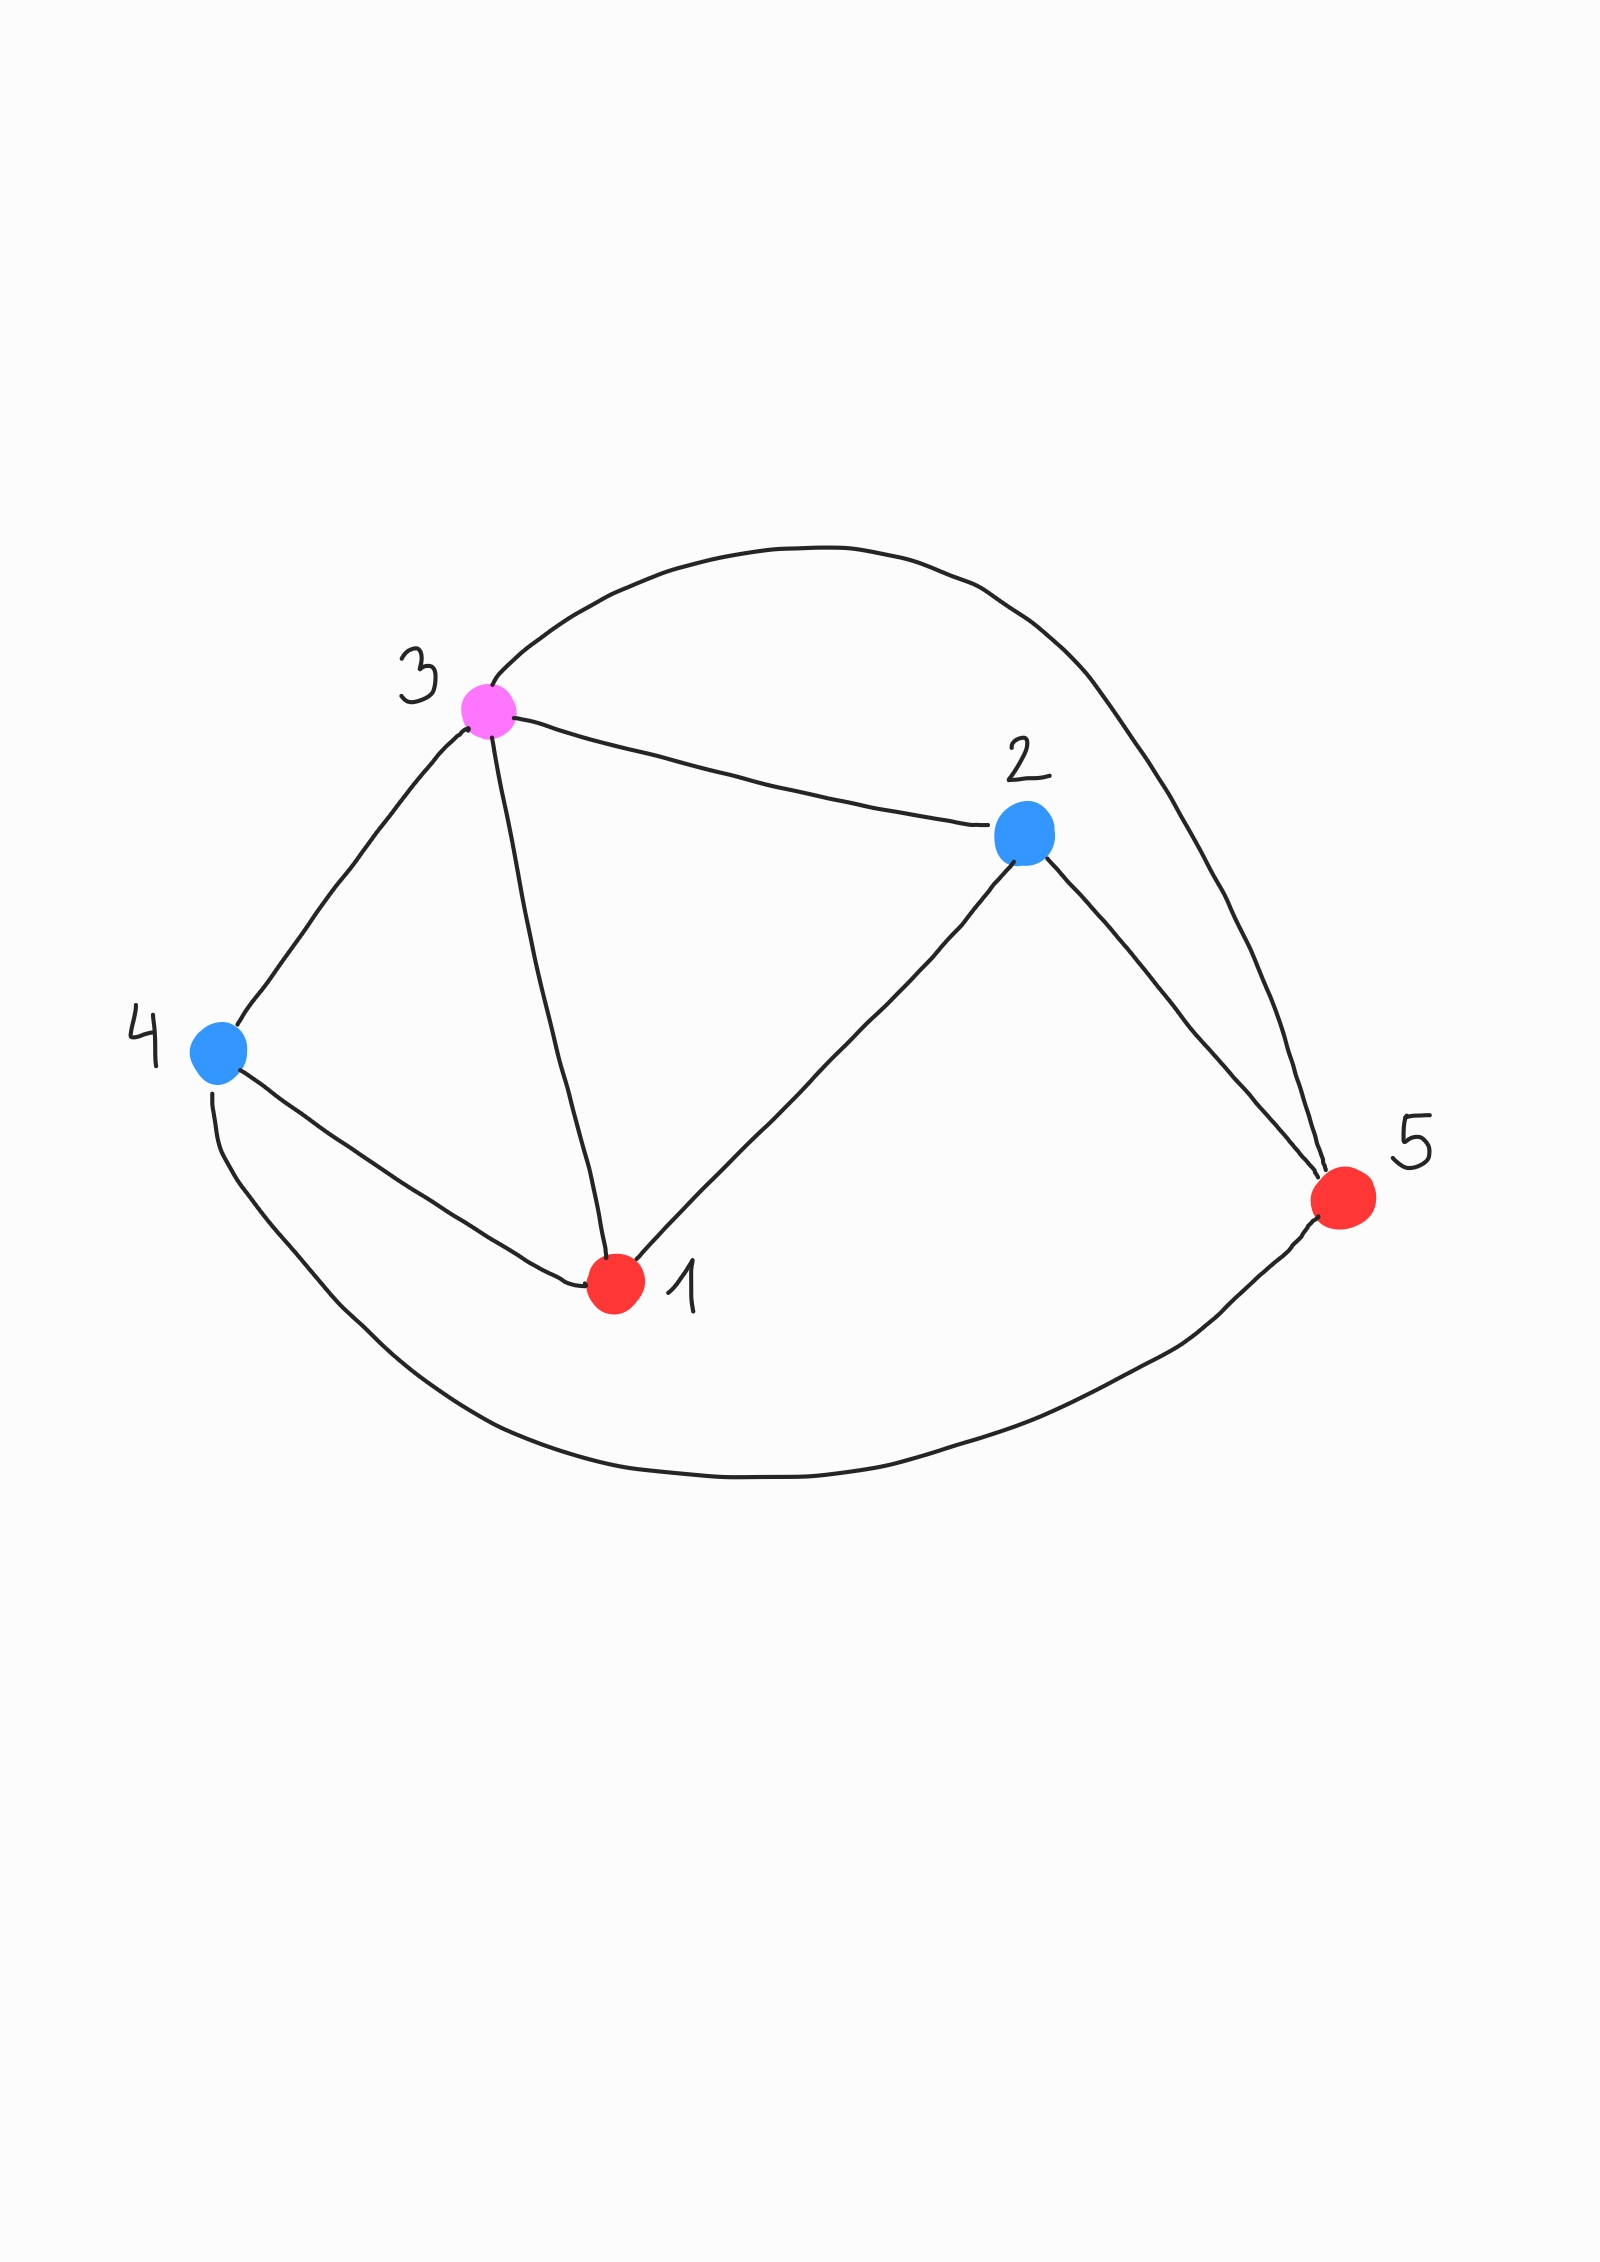


In [ ]:
# Example 2
graph2={
    1: [2],
    2: [1,5],
    3: [4,5],
    4: [3,5],
    5: [2,3,4,6,9,10,11],
    6: [5,7],
    7: [6,8],
    8: [7,13],
    9: [5,10],
    10: [5,9,12],
    11: [5,12],
    12: [10,11,13],
    13: [8,12]
}

coloring = five_color_planar_graph(graph2)
print("Vertex Coloring:", coloring)

Vertex Coloring: {'red': [13, 11, 10, 7, 4, 2], 'blue': [12, 9, 8, 6, 3, 1], 'pink': [5]}


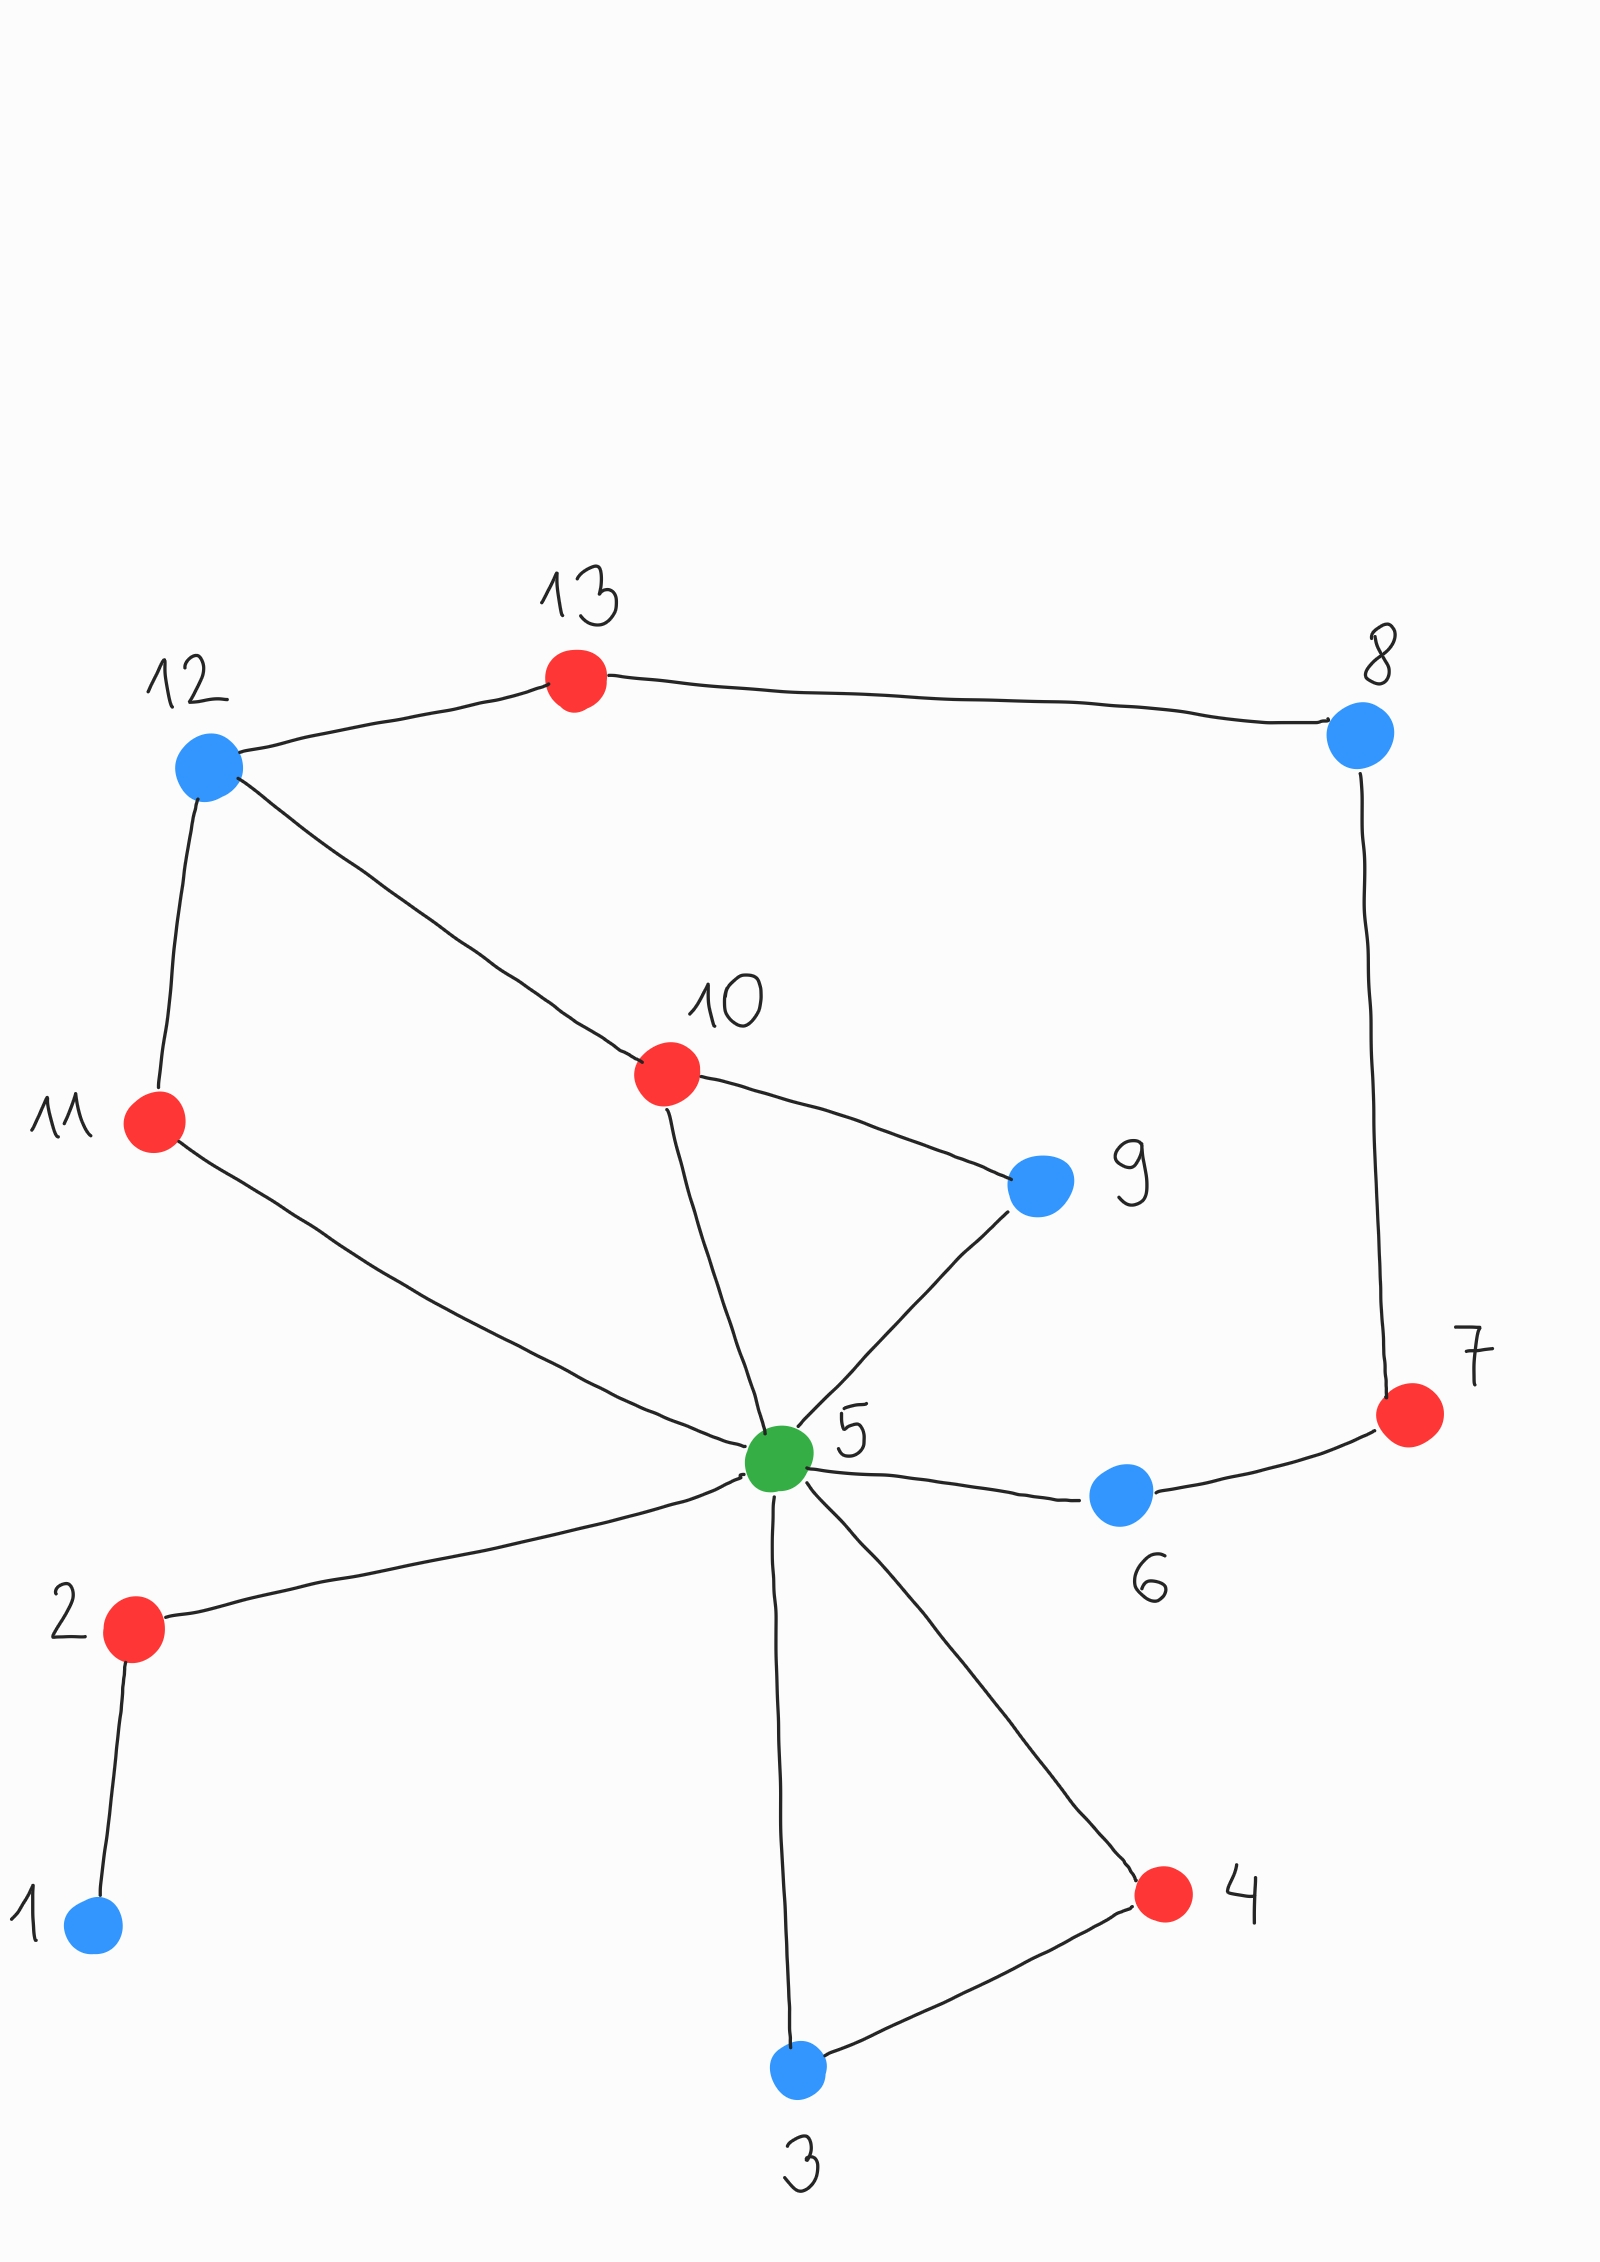

In [ ]:
# Example 3
graph3={
    1: [2,3],
    2: [1,3],
    3: [1,2,4,5,6,7,8,17],
    4: [3,8,15],
    5: [3,11],
    6: [3,7,10],
    7: [3,6,9],
    8: [3,4,16],
    9: [7,10,12,13,14,15,16],
    10: [6,9,11],
    11: [5,10],
    12: [9,13],
    13: [9,12],
    14: [9,15],
    15: [4,9,14],
    16: [8,9],
    17: [3]
}

coloring = five_color_planar_graph(graph3)
print("Vertex Coloring:", coloring)

Vertex Coloring: {'red': [17, 16, 15, 13, 11, 7, 2], 'blue': [14, 12, 10, 8, 5, 1], 'pink': [9, 6, 4], 'green': [3]}


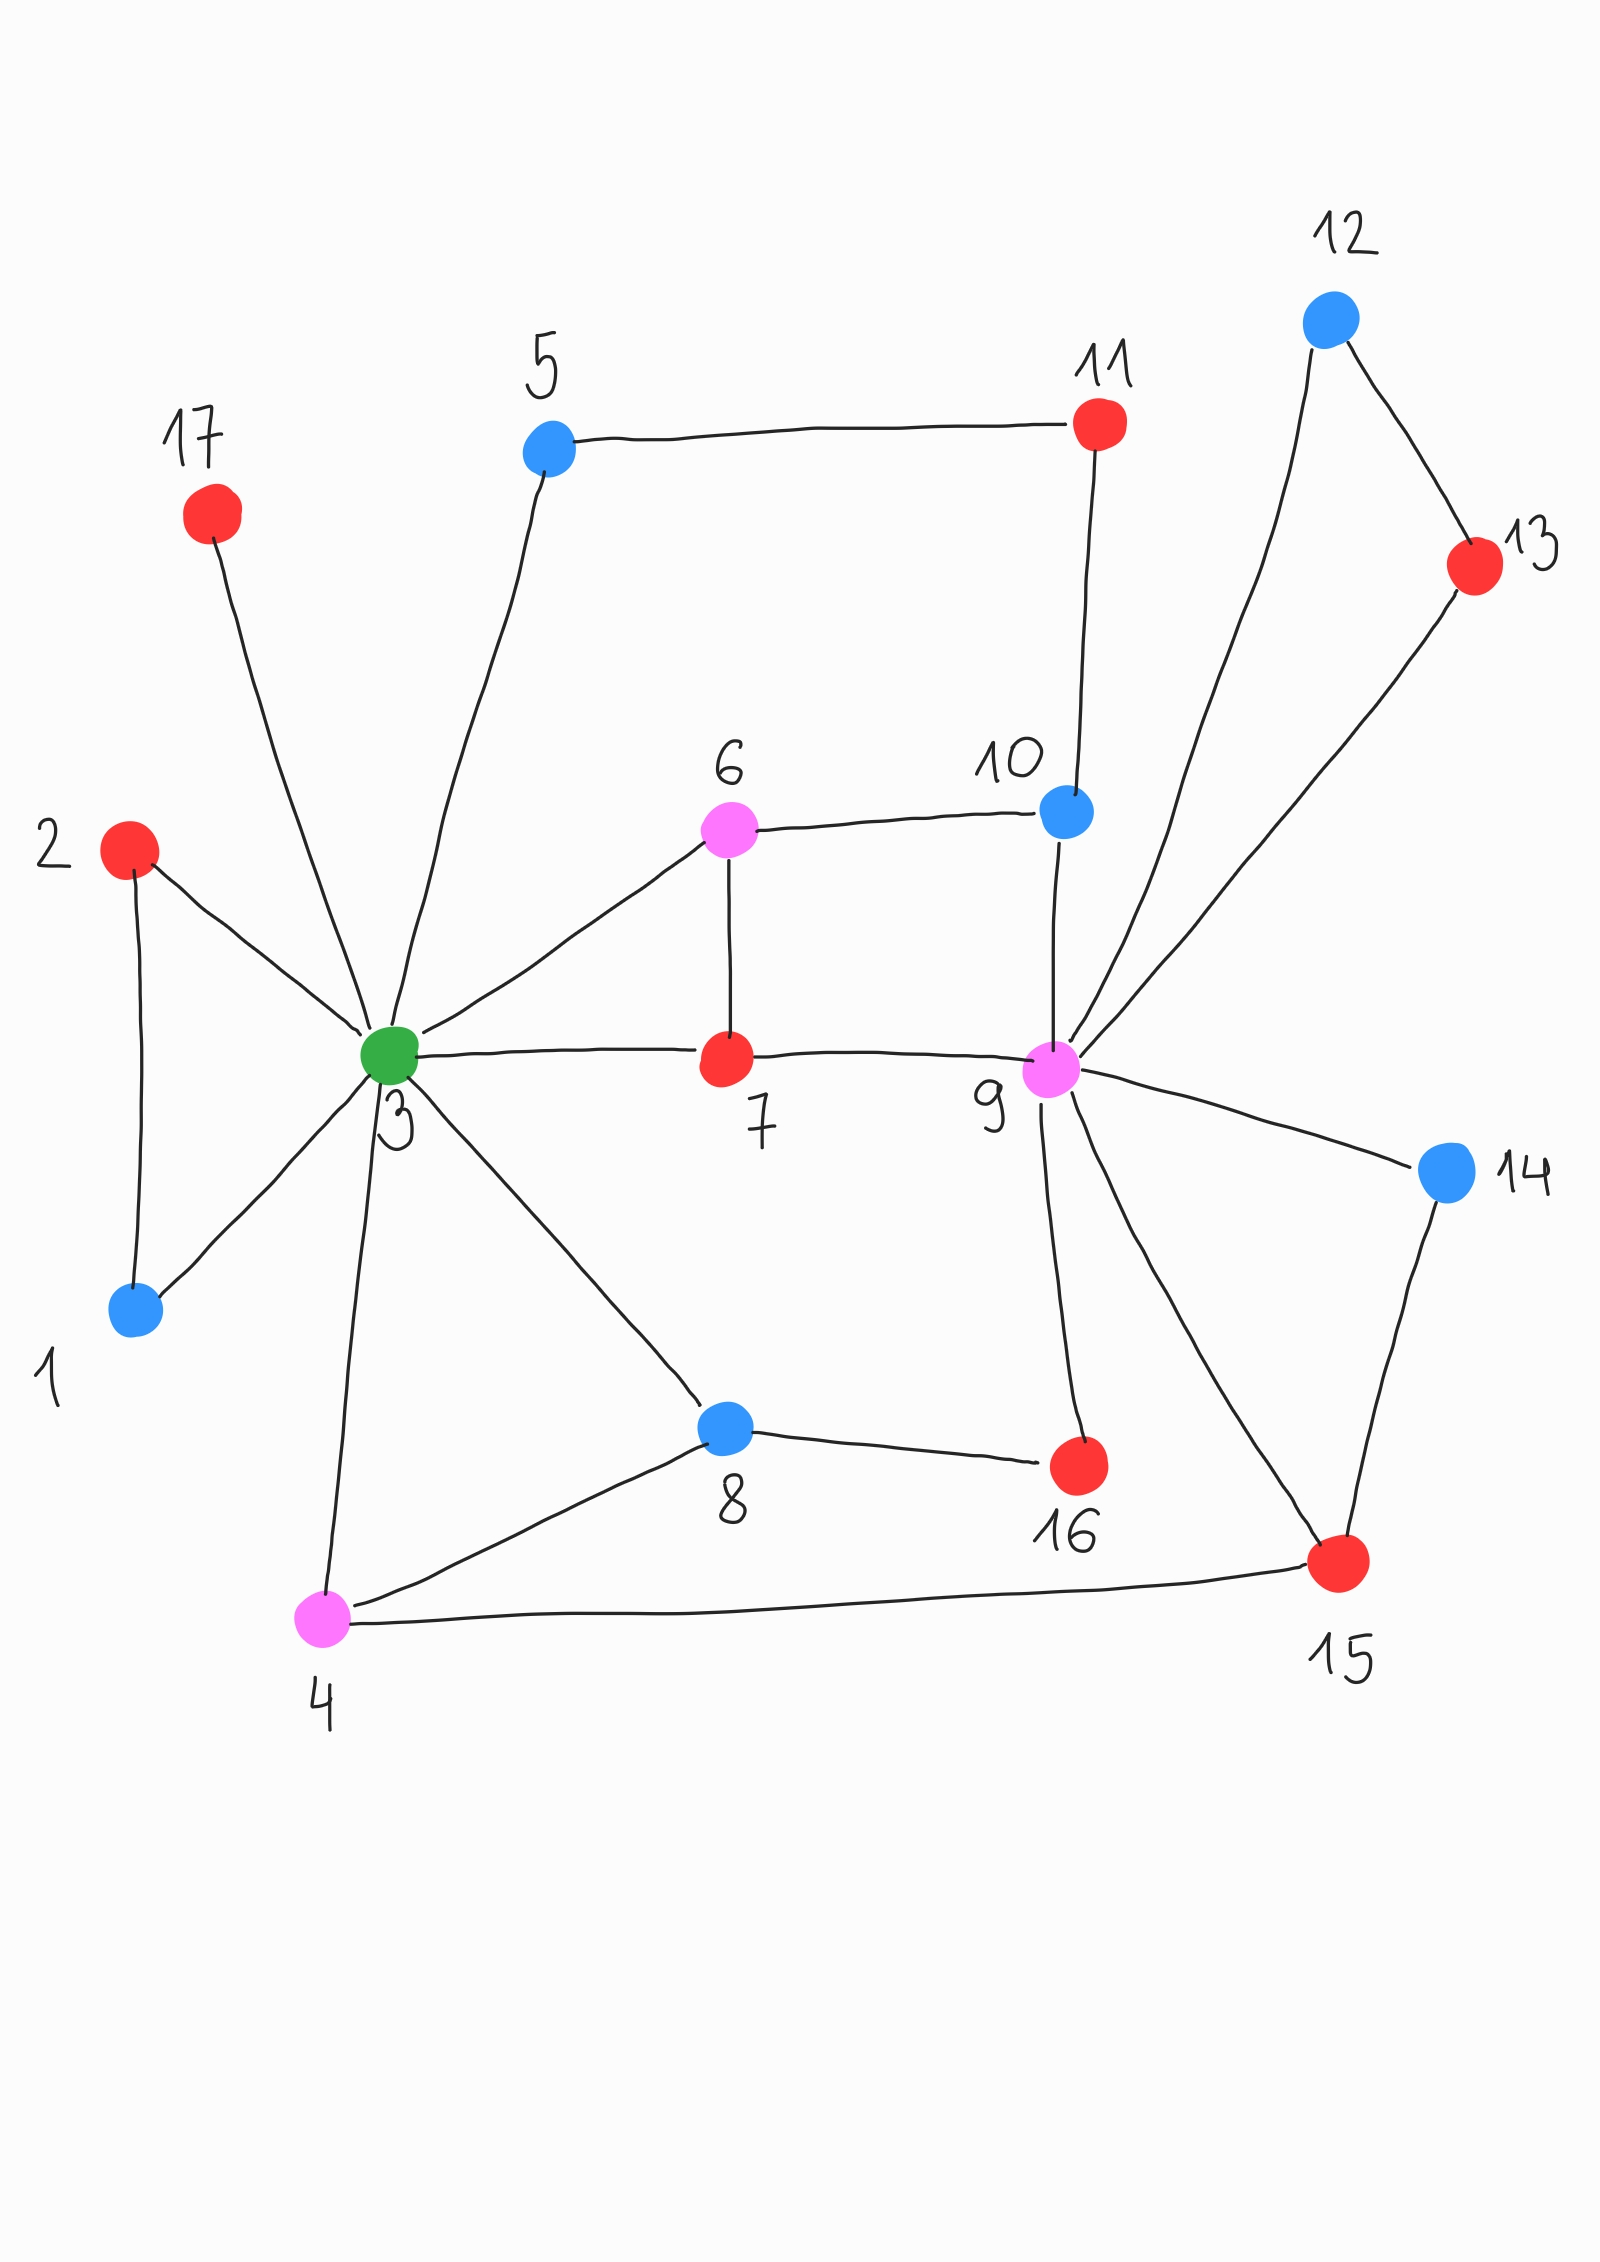